In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

# Data Structure

In [2]:
data_dir = 'data'

if os.path.isdir(data_dir):
    for dirname, _, filenames in os.walk(data_dir):
        for filename in filenames:
            print(os.path.join(dirname, filename))
else:
    print('Please checkout to include-data branch.')

data/big-five-personality-test/6.csv
data/big-five-personality-test/5.csv
data/big-five-personality-test/4.csv
data/big-five-personality-test/1.csv
data/big-five-personality-test/3.csv
data/big-five-personality-test/2.csv


# Handle Big Five Personality Data

In [3]:
data_final_dir = 'data/big-five-personality-test'

csv_reading = list()
is_reduce = False

if os.path.isdir(data_final_dir):
    for dirname, _, filenames in os.walk(data_final_dir):
        for filename in filenames:
            if(not is_reduce or filename == '6.csv'):
                csv_reading.append(pd.read_csv(os.path.join(dirname, filename), sep='\t'))
                print(f'Reading: {os.path.join(dirname, filename)}, Total: {len(csv_reading[-1])}')
else:
    print('Please checkout to include-data branch.')

data = pd.concat(csv_reading)  

print(f'Total: {len(data)}')
data.head()

Reading: data/big-five-personality-test/6.csv, Total: 13558
Reading: data/big-five-personality-test/5.csv, Total: 200000
Reading: data/big-five-personality-test/4.csv, Total: 200000
Reading: data/big-five-personality-test/1.csv, Total: 200000
Reading: data/big-five-personality-test/3.csv, Total: 200000
Reading: data/big-five-personality-test/2.csv, Total: 200000
Total: 1013558


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,2,2,4,5,3,2,3,5,1,5,...,2018-11-02 07:26:28,1920.0,1080.0,4.0,143,6,1,US,40.802,-77.8564
1,2,3,4,3,4,2,3,4,2,4,...,2018-11-02 07:27:05,375.0,812.0,16.0,487,11,2,US,38.0,-97.0
2,2,2,4,3,4,2,2,4,3,4,...,2018-11-02 07:27:48,1500.0,1000.0,10.0,414,13,1,US,47.8561,-122.2829
3,4,1,2,4,4,2,5,4,4,2,...,2018-11-02 07:28:14,1280.0,720.0,12.0,188,13,1,US,35.9606,-83.9207
4,1,5,2,4,3,3,1,5,1,5,...,2018-11-02 07:29:32,1366.0,768.0,29.0,105,9,1,US,34.7044,-84.4253


# Reverse value

In [4]:
positively_keyed = ['EXT1', 'EXT3', 'EXT5', 'EXT7', 'EXT9',
                    'EST1', 'EST3', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10',
                    'AGR2', 'AGR4', 'AGR6', 'AGR8', 'AGR9', 'AGR10',
                    'CSN1', 'CSN3', 'CSN5', 'CSN7', 'CSN9', 'CSN10', 
                    'OPN1', 'OPN3', 'OPN5', 'OPN7', 'OPN8', 'OPN9', 'OPN10']

negatively_keyed = ['EXT2', 'EXT4', 'EXT6', 'EXT8', 'EXT10',
                    'EST2', 'EST4',
                    'AGR1', 'AGR3', 'AGR5', 'AGR7', 
                    'CSN2', 'CSN4', 'CSN6', 'CSN8', 
                    'OPN2', 'OPN4', 'OPN6']

In [5]:
data.loc[:, negatively_keyed] = 6 - data.loc[:, negatively_keyed]

# Factor aggregation

In [6]:
EXT = ['EXT' + str(i) for i in range(1,11)]
EST = ['EST' + str(i) for i in range(1,11)]
AGR = ['AGR' + str(i) for i in range(1,11)]
CSN = ['CSN' + str(i) for i in range(1,11)]
OPN = ['OPN' + str(i) for i in range(1,11)]

In [7]:
data['OPN'] = data.loc[:, OPN].mean(axis=1)

In [8]:
filter_columns = [] + EXT + EST + AGR + CSN + ['OPN', ]
data = data.loc[:, filter_columns]

In [9]:
print(f'Total: {len(data)}')
data.head()

Total: 1013558


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN
0,2,4,4,1,3,4,3,1,1,1,...,4,4,4,4,4,3,3,3,3,3.4
1,2,3,4,3,4,4,3,2,2,2,...,4,4,5,3,4,5,4,5,3,4.2
2,2,4,4,3,4,4,2,2,3,2,...,3,4,4,2,4,4,4,4,4,3.9
3,4,5,2,2,4,4,5,2,4,4,...,2,3,4,2,1,5,2,4,4,3.1
4,1,1,2,2,3,3,1,1,1,1,...,5,5,4,4,5,5,4,4,4,4.0


In [10]:
data.dtypes

EXT1       int64
EXT2       int64
EXT3       int64
EXT4       int64
EXT5       int64
EXT6       int64
EXT7       int64
EXT8       int64
EXT9       int64
EXT10      int64
EST1       int64
EST2       int64
EST3       int64
EST4       int64
EST5       int64
EST6       int64
EST7       int64
EST8       int64
EST9       int64
EST10      int64
AGR1       int64
AGR2       int64
AGR3       int64
AGR4       int64
AGR5       int64
AGR6       int64
AGR7       int64
AGR8       int64
AGR9       int64
AGR10      int64
CSN1       int64
CSN2       int64
CSN3       int64
CSN4       int64
CSN5       int64
CSN6       int64
CSN7       int64
CSN8       int64
CSN9       int64
CSN10      int64
OPN      float64
dtype: object

# Random Data

In [11]:
data_num = data.shape[0]
indexes = np.random.permutation(data_num)

In [12]:
proportion = [0.98, 0.01, 0.01] if data_num > 1000000 else [0.6, 0.2, 0.2]

train_indexes = indexes[:int(data_num * proportion[0])]
val_indexes = indexes[int(data_num * proportion[0]):int(data_num * (proportion[0] + proportion[1]))]
test_indexes = indexes[int(data_num * (proportion[0] + proportion[1])):]

train_data = data.loc[train_indexes] if is_reduce else data[:int(data_num * proportion[0])]
val_data = data.loc[val_indexes] if is_reduce else data[int(data_num * proportion[0]):int(data_num * (proportion[0] + proportion[1]))]
test_data = data.loc[test_indexes] if is_reduce else data[int(data_num * (proportion[0] + proportion[1])):]

print(f'''train_data: {len(train_data)}
val_data: {len(val_data)}
test_data: {len(test_data)}''')

train_data: 993286
val_data: 10136
test_data: 10136


# Normalization

In [13]:
train_validation_data = pd.concat([train_data, val_data])
mean = train_validation_data.mean()
std = train_validation_data.std()

In [14]:
train_data = (train_data - mean) / std
val_data = (val_data - mean) / std

# Establish training data in Numpy array format

In [15]:
x_train = np.array(train_data.drop('OPN', axis='columns'))
y_train = np.array(train_data['OPN'])
x_val = np.array(val_data.drop('OPN', axis='columns'))
y_val = np.array(val_data['OPN'])

In [16]:
model_dir = os.path.join('logs', 'models')

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Create Model

## Initialising the ANN

In [17]:
model = keras.Sequential(name='model')

## Adding the input layer and the first hidden layer

In [18]:
model.add(layers.Dense(64, kernel_initializer='uniform', activation='relu', input_shape=((len(filter_columns) - 1),)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1))

## Compiling the ANN

In [19]:
model.compile(keras.optimizers.Adam(0.001),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.MeanAbsoluteError()])

## Set callback function

In [20]:
log_dir = os.path.join('logs', 'model')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(os.path.join(model_dir, 'Best-model.h5'), 
                                             monitor='val_mean_absolute_error', 
                                             save_best_only=True, 
                                             mode='min')

In [21]:
history = model.fit(x_train, y_train,
               batch_size=150,
               epochs=100,
               validation_data=(x_val, y_val),
               callbacks=[model_cbk, model_mckp])

Train on 993286 samples, validate on 10136 samples
Epoch 1/100
993286/993286 [==============================] - 10s 10us/sample - loss: 0.7242 - mean_absolute_error: 0.6766 - val_loss: 0.7083 - val_mean_absolute_error: 0.6629
Epoch 2/100
993286/993286 [==============================] - 8s 9us/sample - loss: 0.7143 - mean_absolute_error: 0.6715 - val_loss: 0.7082 - val_mean_absolute_error: 0.6634
Epoch 3/100
993286/993286 [==============================] - 8s 9us/sample - loss: 0.7122 - mean_absolute_error: 0.6703 - val_loss: 0.7053 - val_mean_absolute_error: 0.6628
Epoch 4/100
993286/993286 [==============================] - 8s 9us/sample - loss: 0.7104 - mean_absolute_error: 0.6692 - val_loss: 0.7015 - val_mean_absolute_error: 0.6599
Epoch 5/100
993286/993286 [==============================] - 9s 9us/sample - loss: 0.7093 - mean_absolute_error: 0.6687 - val_loss: 0.7021 - val_mean_absolute_error: 0.6628
Epoch 6/100
993286/993286 [==============================] - 9s 9us/sample - loss:

993286/993286 [==============================] - 10s 10us/sample - loss: 0.7034 - mean_absolute_error: 0.6655 - val_loss: 0.7020 - val_mean_absolute_error: 0.6627
Epoch 48/100
993286/993286 [==============================] - 9s 9us/sample - loss: 0.7026 - mean_absolute_error: 0.6653 - val_loss: 0.6962 - val_mean_absolute_error: 0.6588
Epoch 49/100
993286/993286 [==============================] - 9s 9us/sample - loss: 0.7026 - mean_absolute_error: 0.6652 - val_loss: 0.6983 - val_mean_absolute_error: 0.6623
Epoch 50/100
993286/993286 [==============================] - 9s 9us/sample - loss: 0.7028 - mean_absolute_error: 0.6655 - val_loss: 0.7032 - val_mean_absolute_error: 0.6642
Epoch 51/100
993286/993286 [==============================] - 9s 9us/sample - loss: 0.7029 - mean_absolute_error: 0.6655 - val_loss: 0.7004 - val_mean_absolute_error: 0.6620
Epoch 52/100
993286/993286 [==============================] - 9s 9us/sample - loss: 0.7031 - mean_absolute_error: 0.6654 - val_loss: 0.7123 -

993286/993286 [==============================] - 9s 9us/sample - loss: 0.7018 - mean_absolute_error: 0.6648 - val_loss: 0.6998 - val_mean_absolute_error: 0.6631
Epoch 95/100
993286/993286 [==============================] - 9s 9us/sample - loss: 0.7021 - mean_absolute_error: 0.6648 - val_loss: 0.7002 - val_mean_absolute_error: 0.6629
Epoch 96/100
993286/993286 [==============================] - 9s 9us/sample - loss: 0.7023 - mean_absolute_error: 0.6650 - val_loss: 0.7083 - val_mean_absolute_error: 0.6675
Epoch 97/100
993286/993286 [==============================] - 9s 9us/sample - loss: 0.7021 - mean_absolute_error: 0.6649 - val_loss: 0.6989 - val_mean_absolute_error: 0.6626
Epoch 98/100
993286/993286 [==============================] - 9s 9us/sample - loss: 0.7019 - mean_absolute_error: 0.6649 - val_loss: 0.6990 - val_mean_absolute_error: 0.6603
Epoch 99/100
993286/993286 [==============================] - 9s 9us/sample - loss: 0.7026 - mean_absolute_error: 0.6651 - val_loss: 0.6978 - v

# Verify the effectiveness

In [22]:
model = keras.models.load_model(os.path.join(model_dir, 'Best-model.h5'))

y_test = np.array(test_data['OPN'])
test_data = (test_data - mean) / std

x_test = np.array(test_data.drop('OPN', axis='columns'))
y_pred = model.predict(x_test)
y_pred = np.reshape(y_pred * std['OPN'] + mean['OPN'], y_test.shape)
model_percentage_error = np.nanmean(np.abs(y_test - y_pred)) / np.nanmean(y_test) * 100

# Results of training

## Percentage Error

In [23]:
print("Model: {:.2f}%".format(model_percentage_error))

Model: 11.06%


## acc curve diagram

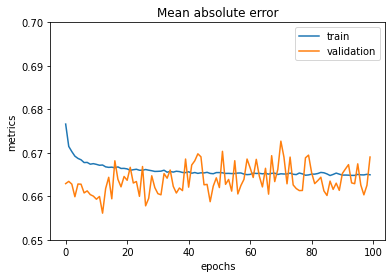

In [32]:
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='validation')
plt.ylim(0.65, 0.7)
plt.title('Mean absolute error')
plt.ylabel('metrics')
plt.xlabel('epochs')
plt.legend(loc='upper right')

## loss curve diagram

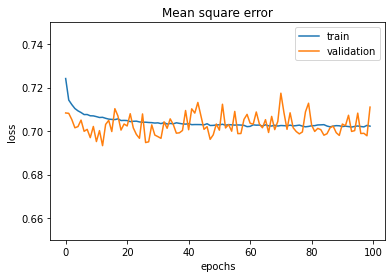

In [36]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylim(0.65, 0.75)
plt.title('Mean square error')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')